# Hamm

This [Jupyter Notebook](https://jupyter.org/) file is part of the master thesis’ project of [Lucy Henriques](https://www.lucyhenriques.com), which aims to analyse walkability in Hamburg. 

It uses the [OSMNx](https://github.com/gboeing/osmnx) Python package.

The complete research is available at [ResearchGate](https://www.researchgate.net/publication/332496058_The_influence_of_the_built_environment_on_walking_The_further_development_and_application_of_a_walkability_tool_in_a_comparison_study_of_two_selected_neighborhoods_and_the_proposal_of_guidelines_to_fo).

## Connectivity analysis

1. Import the OSMnx and Pandas packages

In [1]:
import osmnx as ox, pandas as pd

G = ox.graph_from_place('Hamm, Hamburg', network_type='all')
ox.plot_graph(G, save=True, file_format='svg', filename='Hamm')

<Figure size 738.193x600 with 1 Axes>

(<Figure size 738.193x600 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa1aa32d68>)

In [2]:
stats = ox.basic_stats(G, area=3900000)

In [3]:
extended_stats = ox.extended_stats(G, ecc=True, bc=True, cc=True)

In [4]:
for key, value in extended_stats.items():
    stats[key] = value
series = pd.Series(stats)
series.to_csv(path="stats_series.csv")
series

n                                                                                   1779
m                                                                                   4445
k_avg                                                                            4.99719
intersection_count                                                                  1471
streets_per_node_avg                                                             2.87746
streets_per_node_counts                     {0: 0, 1: 308, 2: 6, 3: 1075, 4: 376, 5: 14}
streets_per_node_proportion            {0: 0.0, 1: 0.1731309724564362, 2: 0.003372681...
edge_length_total                                                                 186252
edge_length_avg                                                                  41.9015
street_length_total                                                               105788
street_length_avg                                                                41.7639
street_segments_count

## Street network centrality analysis

In [5]:
import osmnx as ox
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as colors
import pandas as pd
%matplotlib inline
ox.config(log_console=True, use_cache=True)

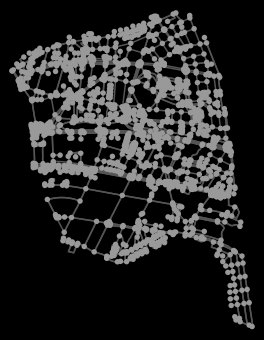

In [6]:
# download and project a street network
G = ox.graph_from_place('Hamm, Hamburg', network_type='all')
G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color='#999999', node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

## Calculate and visualize node centrality

In [7]:
# node closeness centrality
node_centrality = nx.closeness_centrality(G)

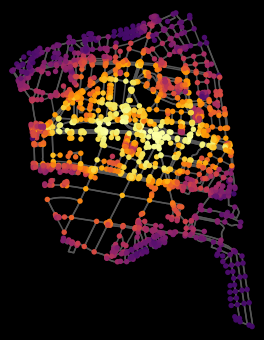

In [8]:
# plot it
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

## Calculate and visualize edge centrality

In [9]:
# edge closeness centrality: convert graph to a line graph so edges become nodes and vice versa
edge_centrality = nx.closeness_centrality(nx.line_graph(G))

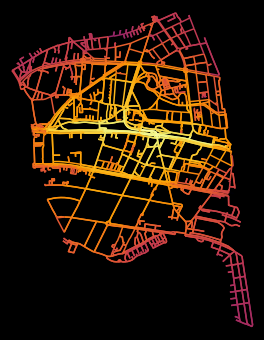

In [19]:
# list of edge values for the orginal graph
ev = [edge_centrality[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', axis_off=True, node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1, file_format='png', filename='hamm02', save=True)

## Building footprint (plus street network) figure-ground diagrams

In [11]:
import osmnx as ox
from IPython.display import Image
%matplotlib inline
ox.config(log_file=True, log_console=True, use_cache=True)

In [12]:
# configure the inline image display
img_folder = 'images'
extension = 'svg'
size = 2000

## Building footprints within the boundaries of Hamm, Hamburg

In [13]:
gdf = ox.buildings_from_place(place='Hamm, Hamburg')
gdf_proj = ox.project_gdf(gdf)
fig, ax = ox.plot_buildings(gdf_proj, bgcolor='#333333', color='w', 
                            save=True, show=False, close=True, filename='hamm_bldgs', dpi=300)
Image('{}/{}.{}'.format(img_folder, 'hamm_bldgs', extension), height=size, width=size)

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

In [14]:
# calculate the area in projected units (meters) of each building footprint, then display first five
areas = gdf_proj.area
areas.head()

24007039    2909.714612
24409939    1435.710491
24776711     172.662394
24777007     224.151530
24848568     120.032121
dtype: float64

In [15]:
# total area (sq m) covered by building footprints
sum(areas)

744367.5995379185

In [16]:
# get the total area within hamm's admin boundary in sq meters
place = ox.gdf_from_place('Hamm, Hamburg')
place_proj = ox.project_gdf(place)
place_proj.area.iloc[0]

3876548.1255636695

In [17]:
# what proportion of Hamm is covered by building footprints?
sum(areas) / place_proj.area.iloc[0]

0.19201815002095032

## Contact

Feel free to contact the author at [https://www.lucyhenriques.com](https://www.lucyhenriques.com).


## License

This project is released under the MIT License. Please review the [License file](https://github.com/lucyhenriques/connectivityanalysis/blob/master/LICENSE) for more details.

